# Teoría Arboles de Decision

Los árboles de decisión son un algoritmo de aprendizaje automático ampliamente utilizado en tareas de clasificación y regresión. Estos árboles se basan en la idea de dividir un conjunto de datos en subconjuntos más pequeños de manera recursiva, tomando decisiones en función de las características de los datos.

**Explicación del Algoritmo de Árboles de Decisión:**

1. **División de los Datos:** El algoritmo comienza con todo el conjunto de datos de entrenamiento en la raíz del árbol. Luego, selecciona una característica que particiona (divide) el conjunto de datos en subconjuntos más pequeños. La selección de la característica se basa en criterios como la ganancia de información o la impureza de Gini.


2. **Nodos Internos y Hojas:** Los nodos internos del árbol representan decisiones tomadas en función de las características de los datos. Cada nodo tiene ramas que conducen a nodos secundarios o hojas. Las hojas representan las clases de salida o valores de regresión.


3. **Criterio de Parada:** El proceso de división se repite recursivamente hasta que se cumple un criterio de parada, como alcanzar una profundidad máxima, tener un número mínimo de muestras en una hoja o una impureza mínima.


4. **Clasificación y Regresión:** En una tarea de clasificación, cada hoja contiene la clase de salida más común en el subconjunto de datos que llega a esa hoja. En una tarea de regresión, cada hoja contiene el valor promedio de los objetivos en el subconjunto de datos correspondiente.


5. **Predicción:** Para hacer una predicción con un árbol de decisión, se sigue el camino desde la raíz hasta una hoja en función de las características del nuevo punto de datos. La hoja en la que se aterriza determina la clase o el valor de regresión de la predicción.

**Imágenes Ilustrativas:**

**Ejemplo de Árbol de Decisión:** 

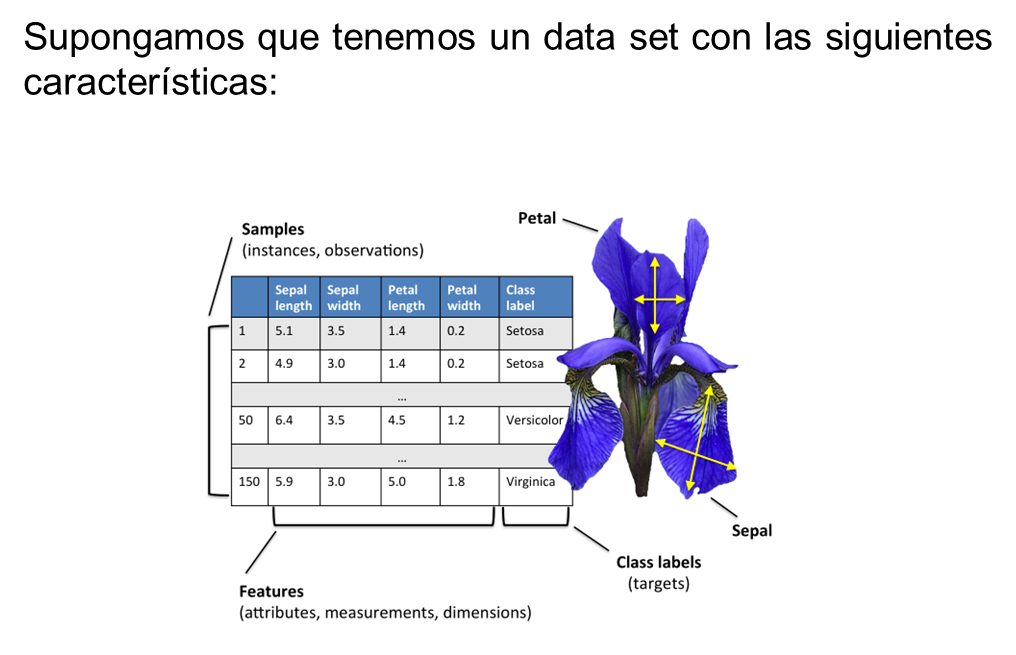

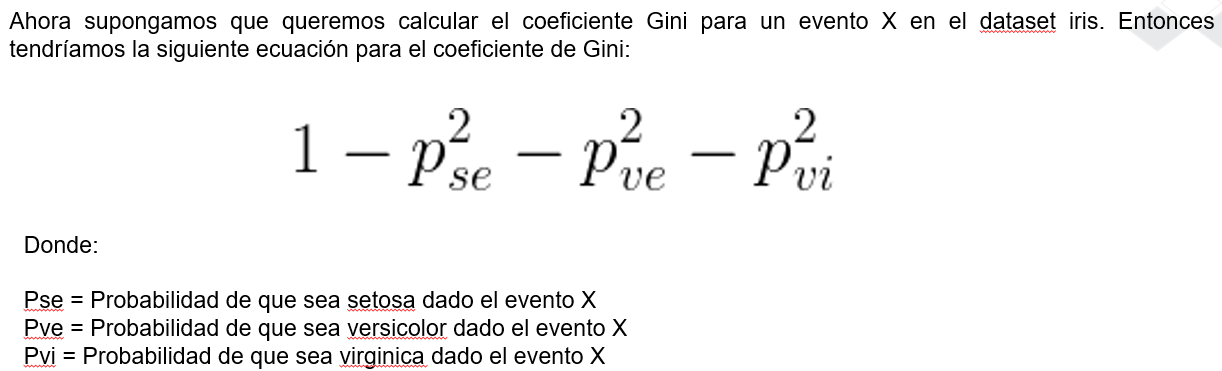

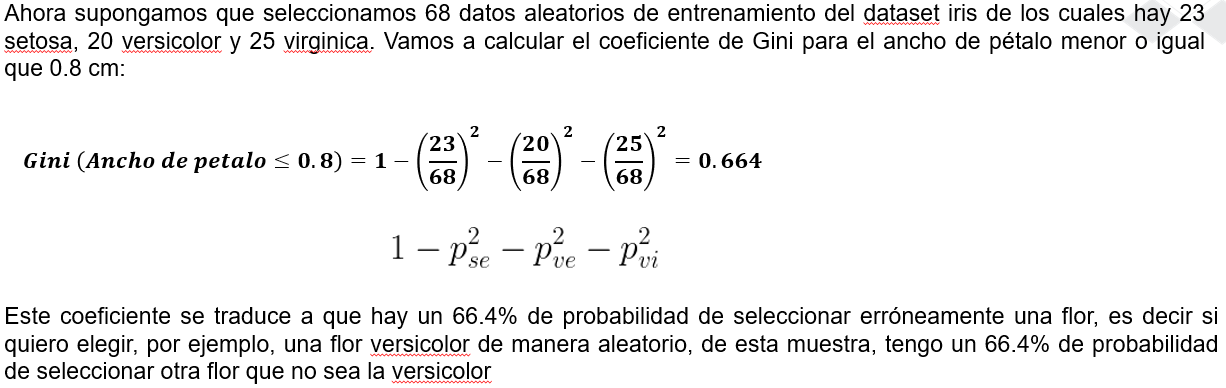

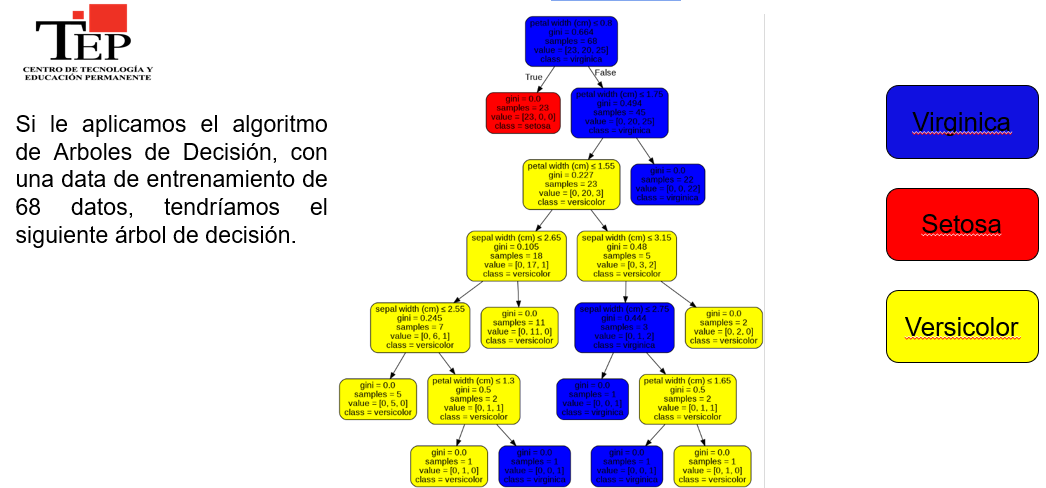

Ver ppt.

In [1]:
from IPython.display import Image

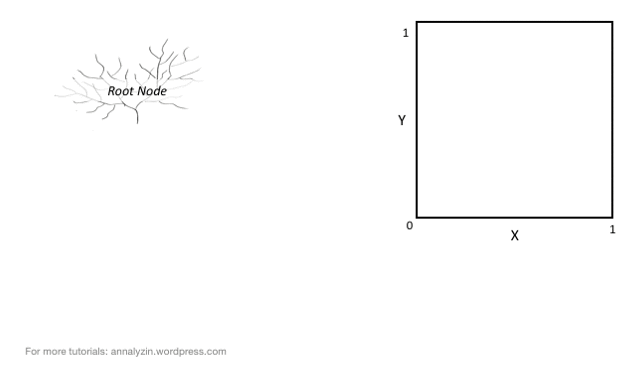

In [2]:
Image(filename=r"C:\Users\gilbe\OneDrive\Desktop\Gilberto\0. TEP\000. Analitica Avanzada de Datos ML\0. Grupo 6\Imagenes\Decission Tree 1.gif")

## Arboles de Decisión y Bosques Aleatorios

En esta ocasión nos han suministrado un dataframe de una institución financiera. Queremos diseñar un modelo para predecir si un cliente está por abandonar la institución o no, de manera que podamos realizar campañas proactivas para retenerlos.


Nuestra variable objetivo es Exited

**Importar librerías**

In [1]:
#pip install shap

In [2]:
import shap

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Obteniendo los datos

In [4]:
pd.options.display.float_format = '{:,.2f}'.format
df = pd.read_excel('abandonos 2.xlsx')

In [5]:
df.head()

CustomerId  CreditScore Geography  Gender  Age  Tenure    Balance  \
0    15634602          619    France  Female   42       2       0.00   
1    15647311          608     Spain  Female   41       1  83,807.86   
2    15619304          502    France  Female   42       8 159,660.80   
3    15701354          699    France  Female   39       1       0.00   
4    15737888          850     Spain  Female   43       2 125,510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0              1          1               1       101,348.88       1  
1              1          0               1       112,542.58       0  
2              3          1               0       113,931.57       1  
3              2          0               0        93,826.63       0  
4              1          1               1        79,084.10       0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


**Veamos la distribución de algunas variables binarias como:**
- Exited (1= abandonó, 0=no abandonó), 
- IsActiveMember (1= miembro activo, 0=no miembro activo), 
- HasCrCard (1= tiene tarjeta de credito, 0=tiene tarjeta de credito)

In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [9]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

**Hagamos un poco de ingeniería de variable convirtiendo estas variables en valores no binarios**

In [10]:
df['Exited'] = df['Exited'].map({1:'abandono',0:'no abandono'})
df['HasCrCard'] = df['HasCrCard'].map({1:'Si',0:'No'})
df['IsActiveMember'] = df['IsActiveMember'].map({1:'Si',0:'No'})

In [11]:
df['Exited'].value_counts()

no abandono    7963
abandono       2037
Name: Exited, dtype: int64

In [12]:
df['IsActiveMember'].value_counts()

Si    5151
No    4849
Name: IsActiveMember, dtype: int64

In [13]:
df['HasCrCard'].value_counts()

Si    7055
No    2945
Name: HasCrCard, dtype: int64

In [14]:
#Proporción de clientes que abandonan.

In [15]:
df['Exited'].value_counts()/len(df) *100

no abandono   79.63
abandono      20.37
Name: Exited, dtype: float64

In [16]:
df.describe()

CustomerId  CreditScore       Age    Tenure    Balance  \
count     10,000.00    10,000.00 10,000.00 10,000.00  10,000.00   
mean  15,690,940.57       650.53     38.92      5.01  76,485.89   
std       71,936.19        96.65     10.49      2.89  62,397.41   
min   15,565,701.00       350.00     18.00      0.00       0.00   
25%   15,628,528.25       584.00     32.00      3.00       0.00   
50%   15,690,738.00       652.00     37.00      5.00  97,198.54   
75%   15,753,233.75       718.00     44.00      7.00 127,644.24   
max   15,815,690.00       850.00     92.00     10.00 250,898.09   

       NumOfProducts  EstimatedSalary  
count      10,000.00        10,000.00  
mean            1.53       100,090.24  
std             0.58        57,510.49  
min             1.00            11.58  
25%             1.00        51,002.11  
50%             1.00       100,193.91  
75%             2.00       149,388.25  
max             4.00       199,992.48

## División entrenamiento y prueba

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop(['Exited','CustomerId'],axis=1)
y = df['Exited']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Preprocesamiento de datos

In [20]:
import os

In [21]:
os.chdir('..')

In [22]:
os.getcwd()

'C:\\Users\\gilbe\\0. Curso de Analítica Avanzada de Datos y Machine Learning v4\\06. Aprendizaje Supervisado'

In [23]:
from src.preprocessing import preprocessing

In [24]:
X_train_df, X_test_df = preprocessing(X_train,X_test, scale_nums = False)

In [25]:
X_train_df.head()

Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
604               1.00               0.00             0.00           0.00   
1911              1.00               0.00             0.00           0.00   
4394              0.00               1.00             0.00           0.00   
6582              0.00               0.00             1.00           1.00   
1428              1.00               0.00             0.00           0.00   

      Gender_Male  HasCrCard_No  HasCrCard_Si  IsActiveMember_No  \
604          1.00          0.00          1.00               0.00   
1911         1.00          0.00          1.00               1.00   
4394         1.00          1.00          0.00               0.00   
6582         0.00          1.00          0.00               0.00   
1428         1.00          0.00          1.00               0.00   

      IsActiveMember_Si  CreditScore   Age  Tenure    Balance  NumOfProducts  \
604                1.00       702.00 37.00   10.00 150,525.80           1.00   
1911               0.00       595.00 41.00    9.00       0.00           2.00   
4394               1.00       479.00 24.00    6.00 107,637.97           2.00   
6582               1.00       525.00 60.00    7.00       0.00           2.00   
1428               1.00       550.00 57.00    5.00       0.00           1.00   

      EstimatedSalary  
604         94,728.49  
1911         5,967.09  
4394       169,505.83  
6582       168,034.90  
1428       133,501.94

## Construyendo nuestro árbol de decisión y evaluando predicciones

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtree = DecisionTreeClassifier(max_depth=3)

In [28]:
dtree.fit(X_train_df,y_train)

DecisionTreeClassifier(max_depth=3)

In [29]:
predictions = dtree.predict(X_test_df)

In [30]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    abandono       0.88      0.24      0.37       652
 no abandono       0.82      0.99      0.90      2348

    accuracy                           0.83      3000
   macro avg       0.85      0.61      0.64      3000
weighted avg       0.83      0.83      0.78      3000



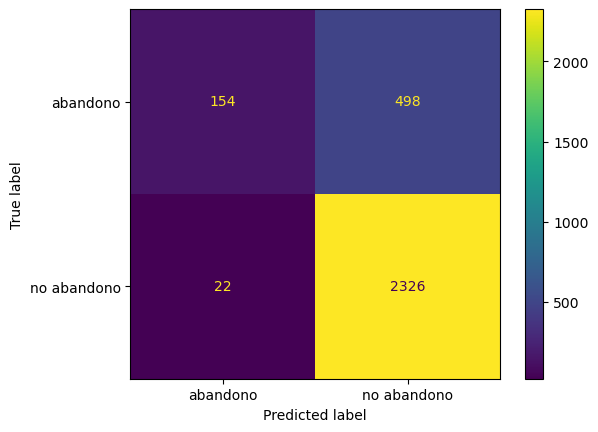

In [32]:
plot_confusion_matrix(dtree, X_test_df, y_test)  
plt.show()

## Tiempo de visualizar nuestro árbol de decisión

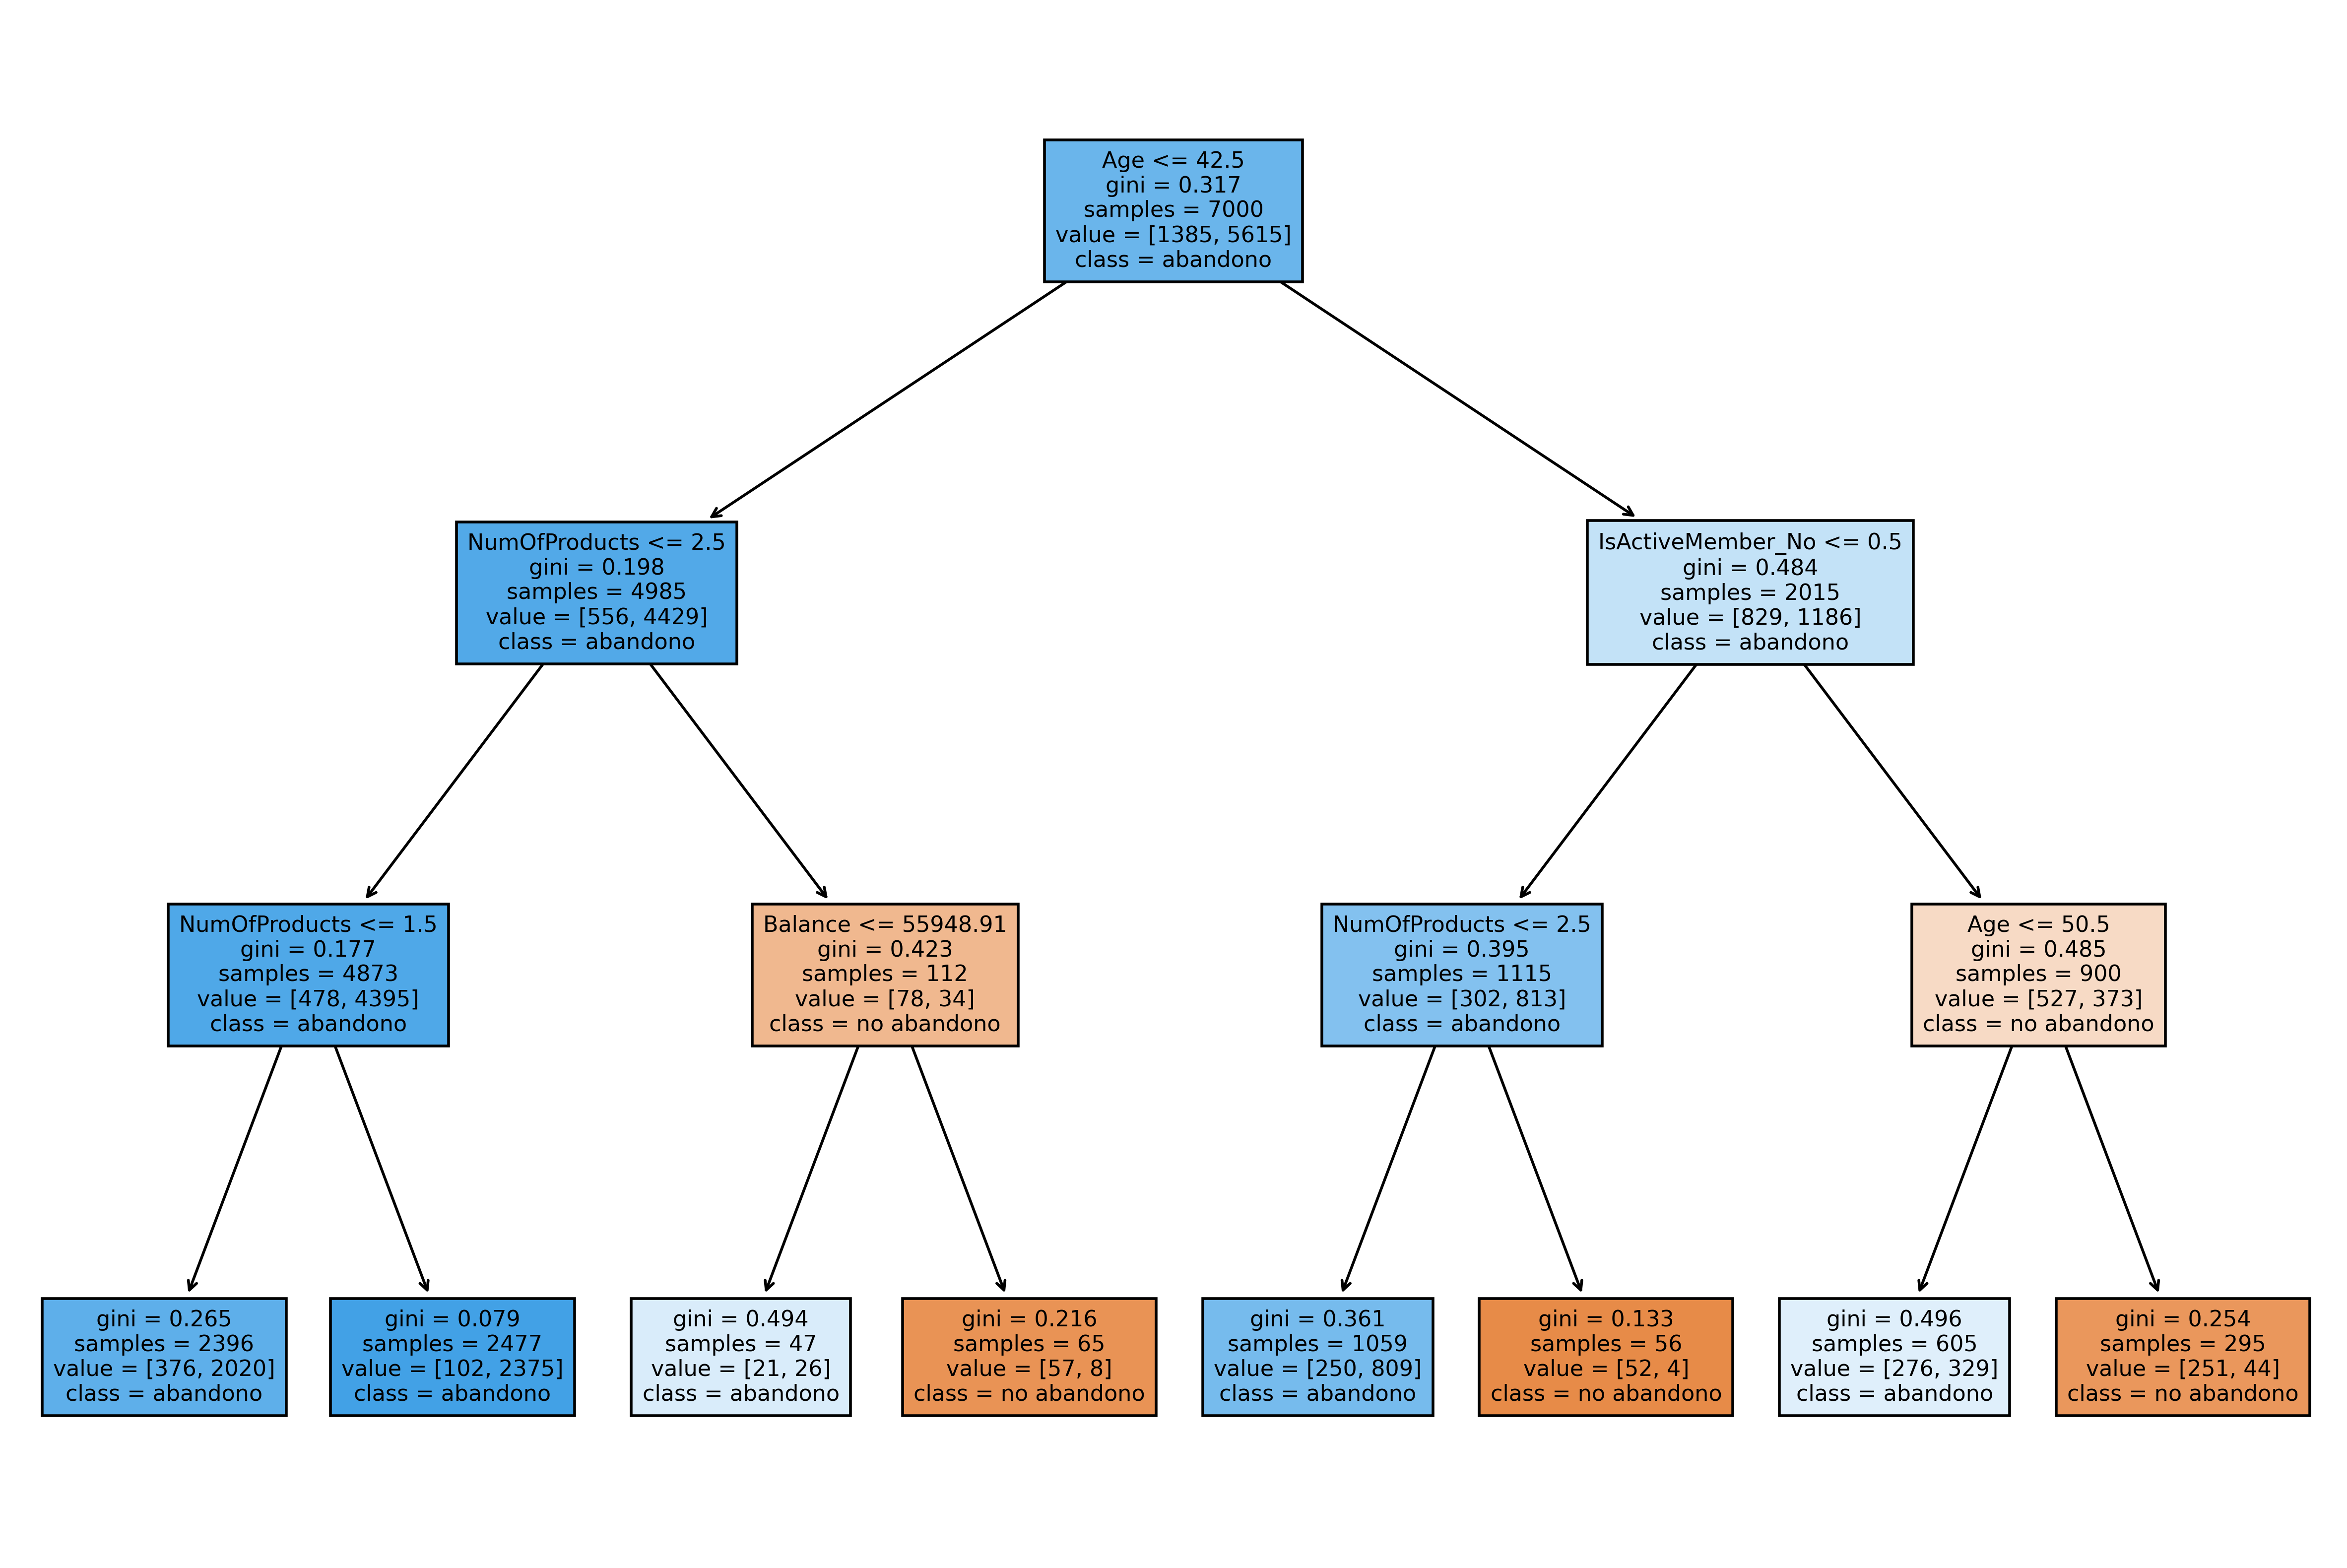

In [33]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=400)
tree.plot_tree(dtree,
               feature_names = X_test_df.columns.tolist(), 
               class_names=['no abandono', 'abandono'],
               filled = True,
               fontsize=8);

## ¿Cuales variables son las más importantes según nuestro árbol de decisión?

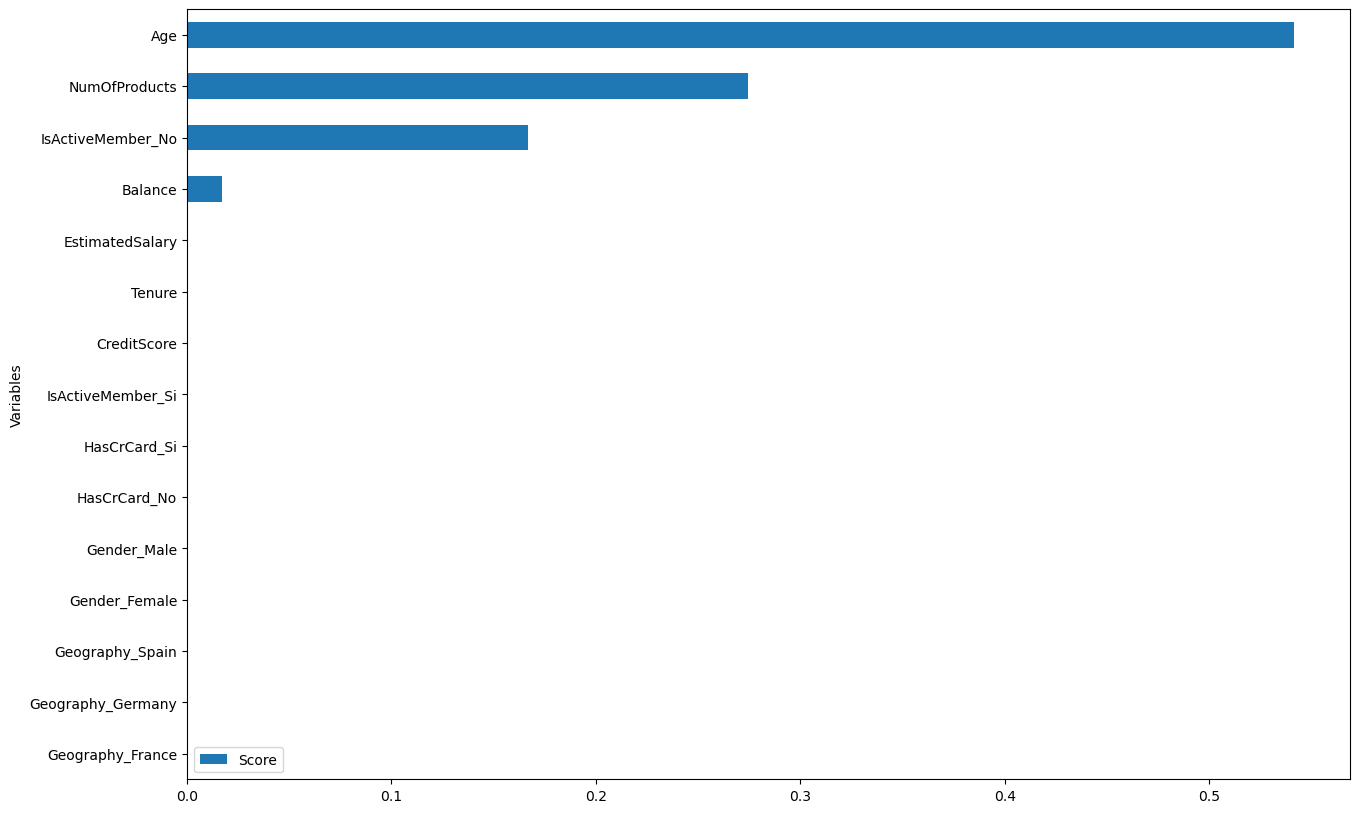

In [34]:
importancia = pd.DataFrame()
importancia['Variables'] = X_test_df.columns
importancia['Score'] = dtree.feature_importances_
importancia.sort_values(by='Score',ascending=True).plot(x='Variables',y='Score',kind='barh',figsize=(15, 10))

plt.show()

# Shap

SHAP, que significa "SHapley Additive ExPlanations", es un marco teórico y una biblioteca de Python que se utiliza para explicar las predicciones de los modelos de aprendizaje automático. Fue desarrollado para proporcionar una comprensión más profunda de cómo los modelos de aprendizaje automático toman decisiones y cómo cada característica contribuye a una predicción específica. Aquí tienes una explicación detallada de lo que es SHAP:

1. **Explicación de Predicciones:** SHAP se centra en proporcionar explicaciones precisas y consistentes para las predicciones de los modelos de aprendizaje automático. Permite responder preguntas como "¿Por qué se hizo esta predicción?" y "¿Cómo contribuyeron las características a la predicción?"

2. **Basado en Teoría de Juegos:** La teoría de juegos de Shapley es un marco matemático en el que se basa SHAP. Esta teoría se utiliza para asignar valores a cada característica, que representan la contribución de la característica a una predicción en un modelo. Es especialmente útil en problemas de atribución y explicación.

3. **Valor Shapley:** El valor Shapley representa la contribución promedio de una característica a todas las predicciones posibles. SHAP calcula estos valores para cada característica y los utiliza para explicar cómo se llega a una predicción específica.

4. **Explicaciones Locales y Globales:** SHAP proporciona tanto explicaciones locales como globales. Las explicaciones locales se refieren a la contribución de las características para una predicción individual, mientras que las explicaciones globales ofrecen una visión general del modelo y cómo se comportan las características en conjunto.

5. **Interpretación de Modelos Complejos:** SHAP se puede aplicar a una amplia variedad de modelos de aprendizaje automático, incluyendo árboles de decisión, modelos de regresión, redes neuronales y más. Esto lo hace útil para la interpretación de modelos complejos y no lineales.

6. **Visualización de Explicaciones:** La biblioteca SHAP ofrece herramientas para visualizar las explicaciones de manera efectiva. Puedes crear gráficos como beeswarm plots, force plots y resumen de valores SHAP para comprender la contribución de las características en las predicciones.

7. **Aplicaciones en la Toma de Decisiones:** SHAP es útil en una variedad de aplicaciones, como la toma de decisiones médicas, la detección de fraudes, la evaluación crediticia, la clasificación de texto y más, donde la interpretación de las decisiones del modelo es crítica.

En resumen, SHAP es una herramienta poderosa para la interpretación de modelos de aprendizaje automático. Proporciona una base teórica sólida para explicar las predicciones de manera coherente y es ampliamente utilizado en la comunidad de aprendizaje automático para comprender y confiar en los modelos complejos.

In [35]:
shap_values = shap.TreeExplainer(dtree).shap_values(X_train_df)

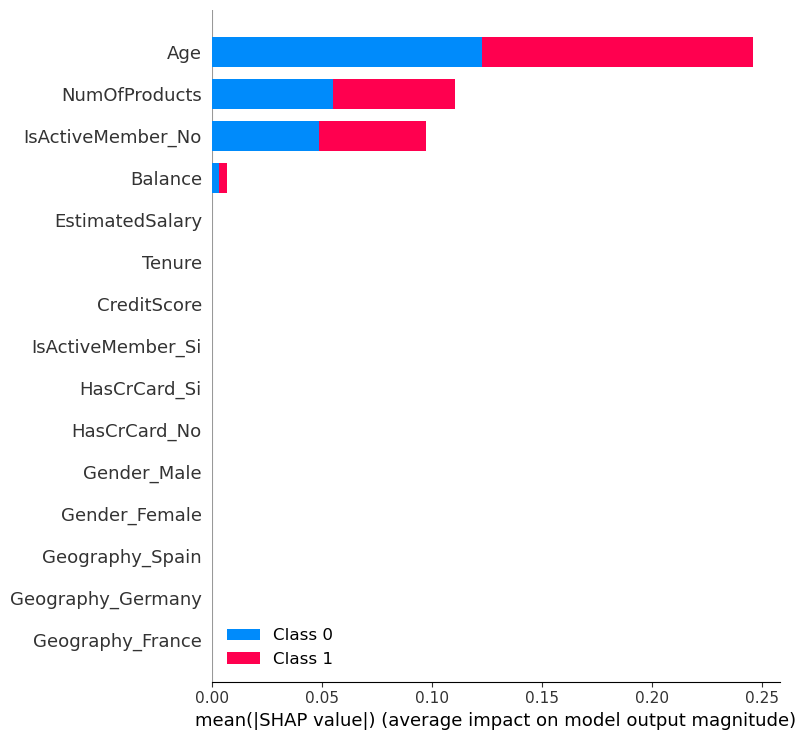

In [36]:
shap.summary_plot(shap_values, X_train_df)

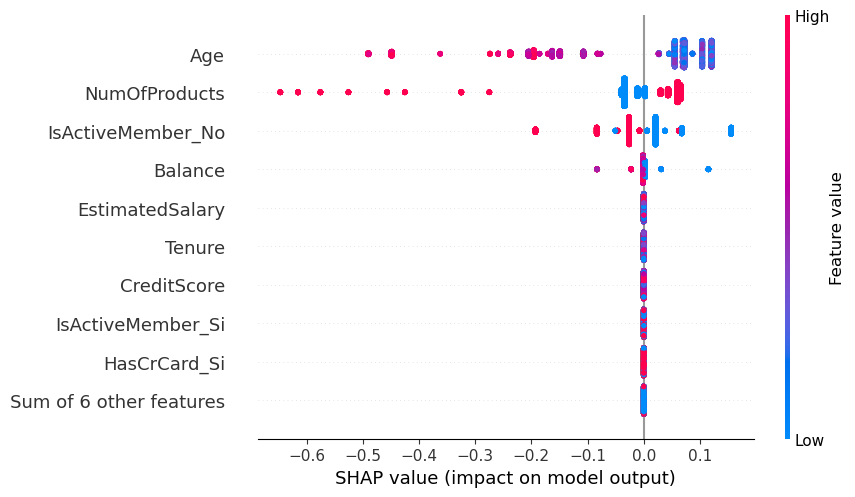

In [37]:
explainer = shap.Explainer(dtree)
shap_values = explainer(X_train_df)
shap.plots.beeswarm(shap_values[:,:,1])

# Balanceo de Datos

Syntetic Minority Over-sampling Technique (SMOTE) como solución a este problema. SMOTE crea instancias nuevas a partir de un sobre-muestreo de las instancias existentes, llevando la clase minoritaria a un número suficiente para ser considerada balanceada y la clase mayoritaria si es necesaria reducirla mediante sub-muestreo aleatorio.


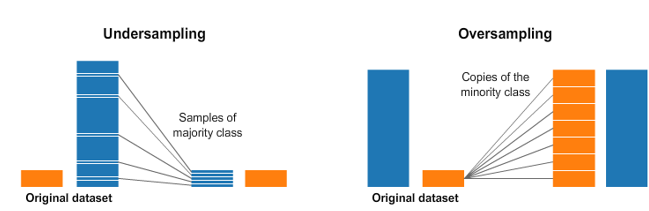

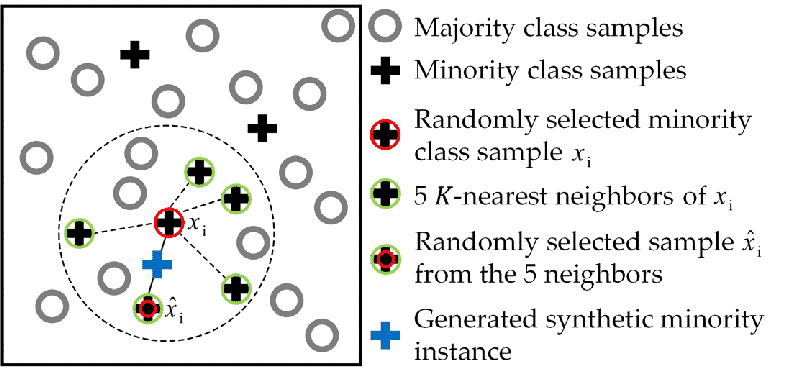

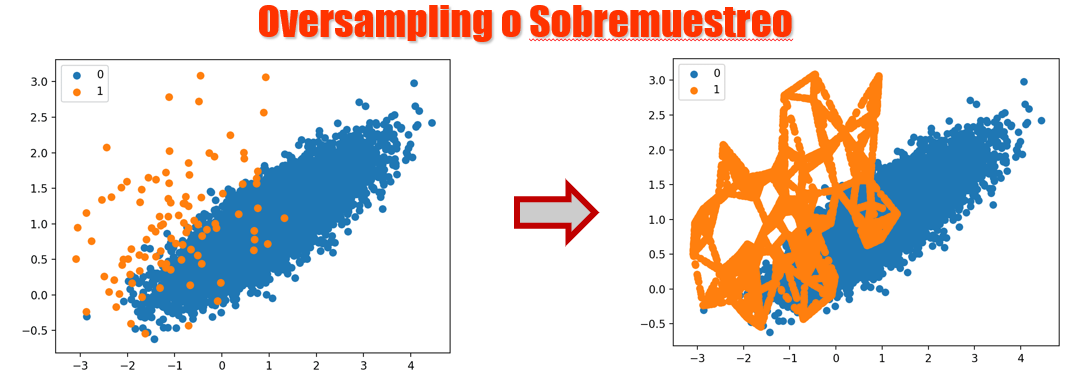


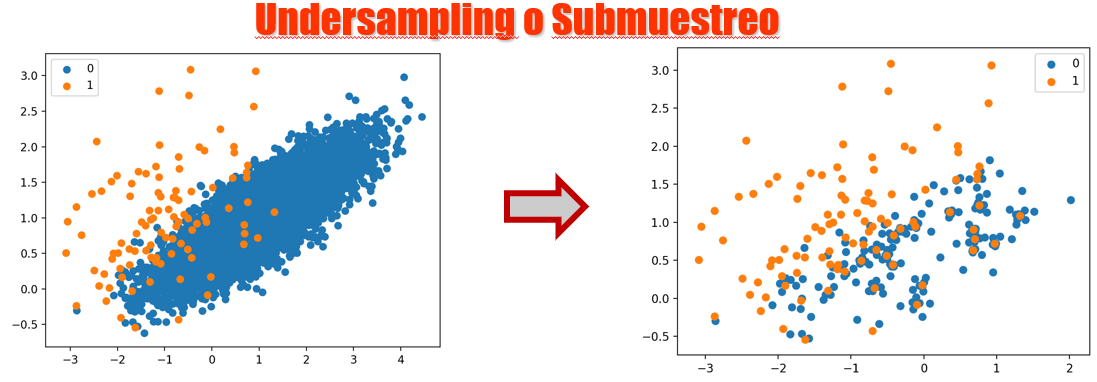


In [38]:
#pip install imblearn

In [39]:
#import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
    
sm_X_train_df, sm_y_train = sm.fit_resample(X_train_df,y_train)
#sm_X_train, sm_X_test, sm_y_train, sm_y_test = train_test_split(sm_X, sm_y, test_size=0.30)

In [40]:
dtree_sm = DecisionTreeClassifier(max_depth=3)

In [41]:
dtree_sm.fit(sm_X_train_df,sm_y_train)

DecisionTreeClassifier(max_depth=3)

In [42]:
predictions_sm = dtree_sm.predict(X_test_df)

In [43]:
print(classification_report(y_test,predictions_sm))

              precision    recall  f1-score   support

    abandono       0.55      0.53      0.54       652
 no abandono       0.87      0.88      0.88      2348

    accuracy                           0.81      3000
   macro avg       0.71      0.71      0.71      3000
weighted avg       0.80      0.81      0.80      3000



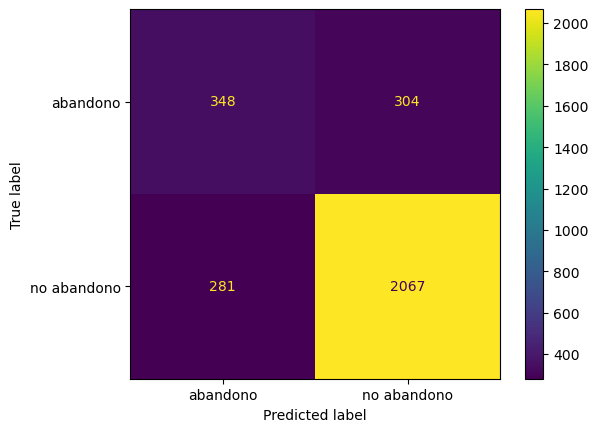

In [44]:
plot_confusion_matrix(dtree_sm, X_test_df, y_test)  
plt.show()

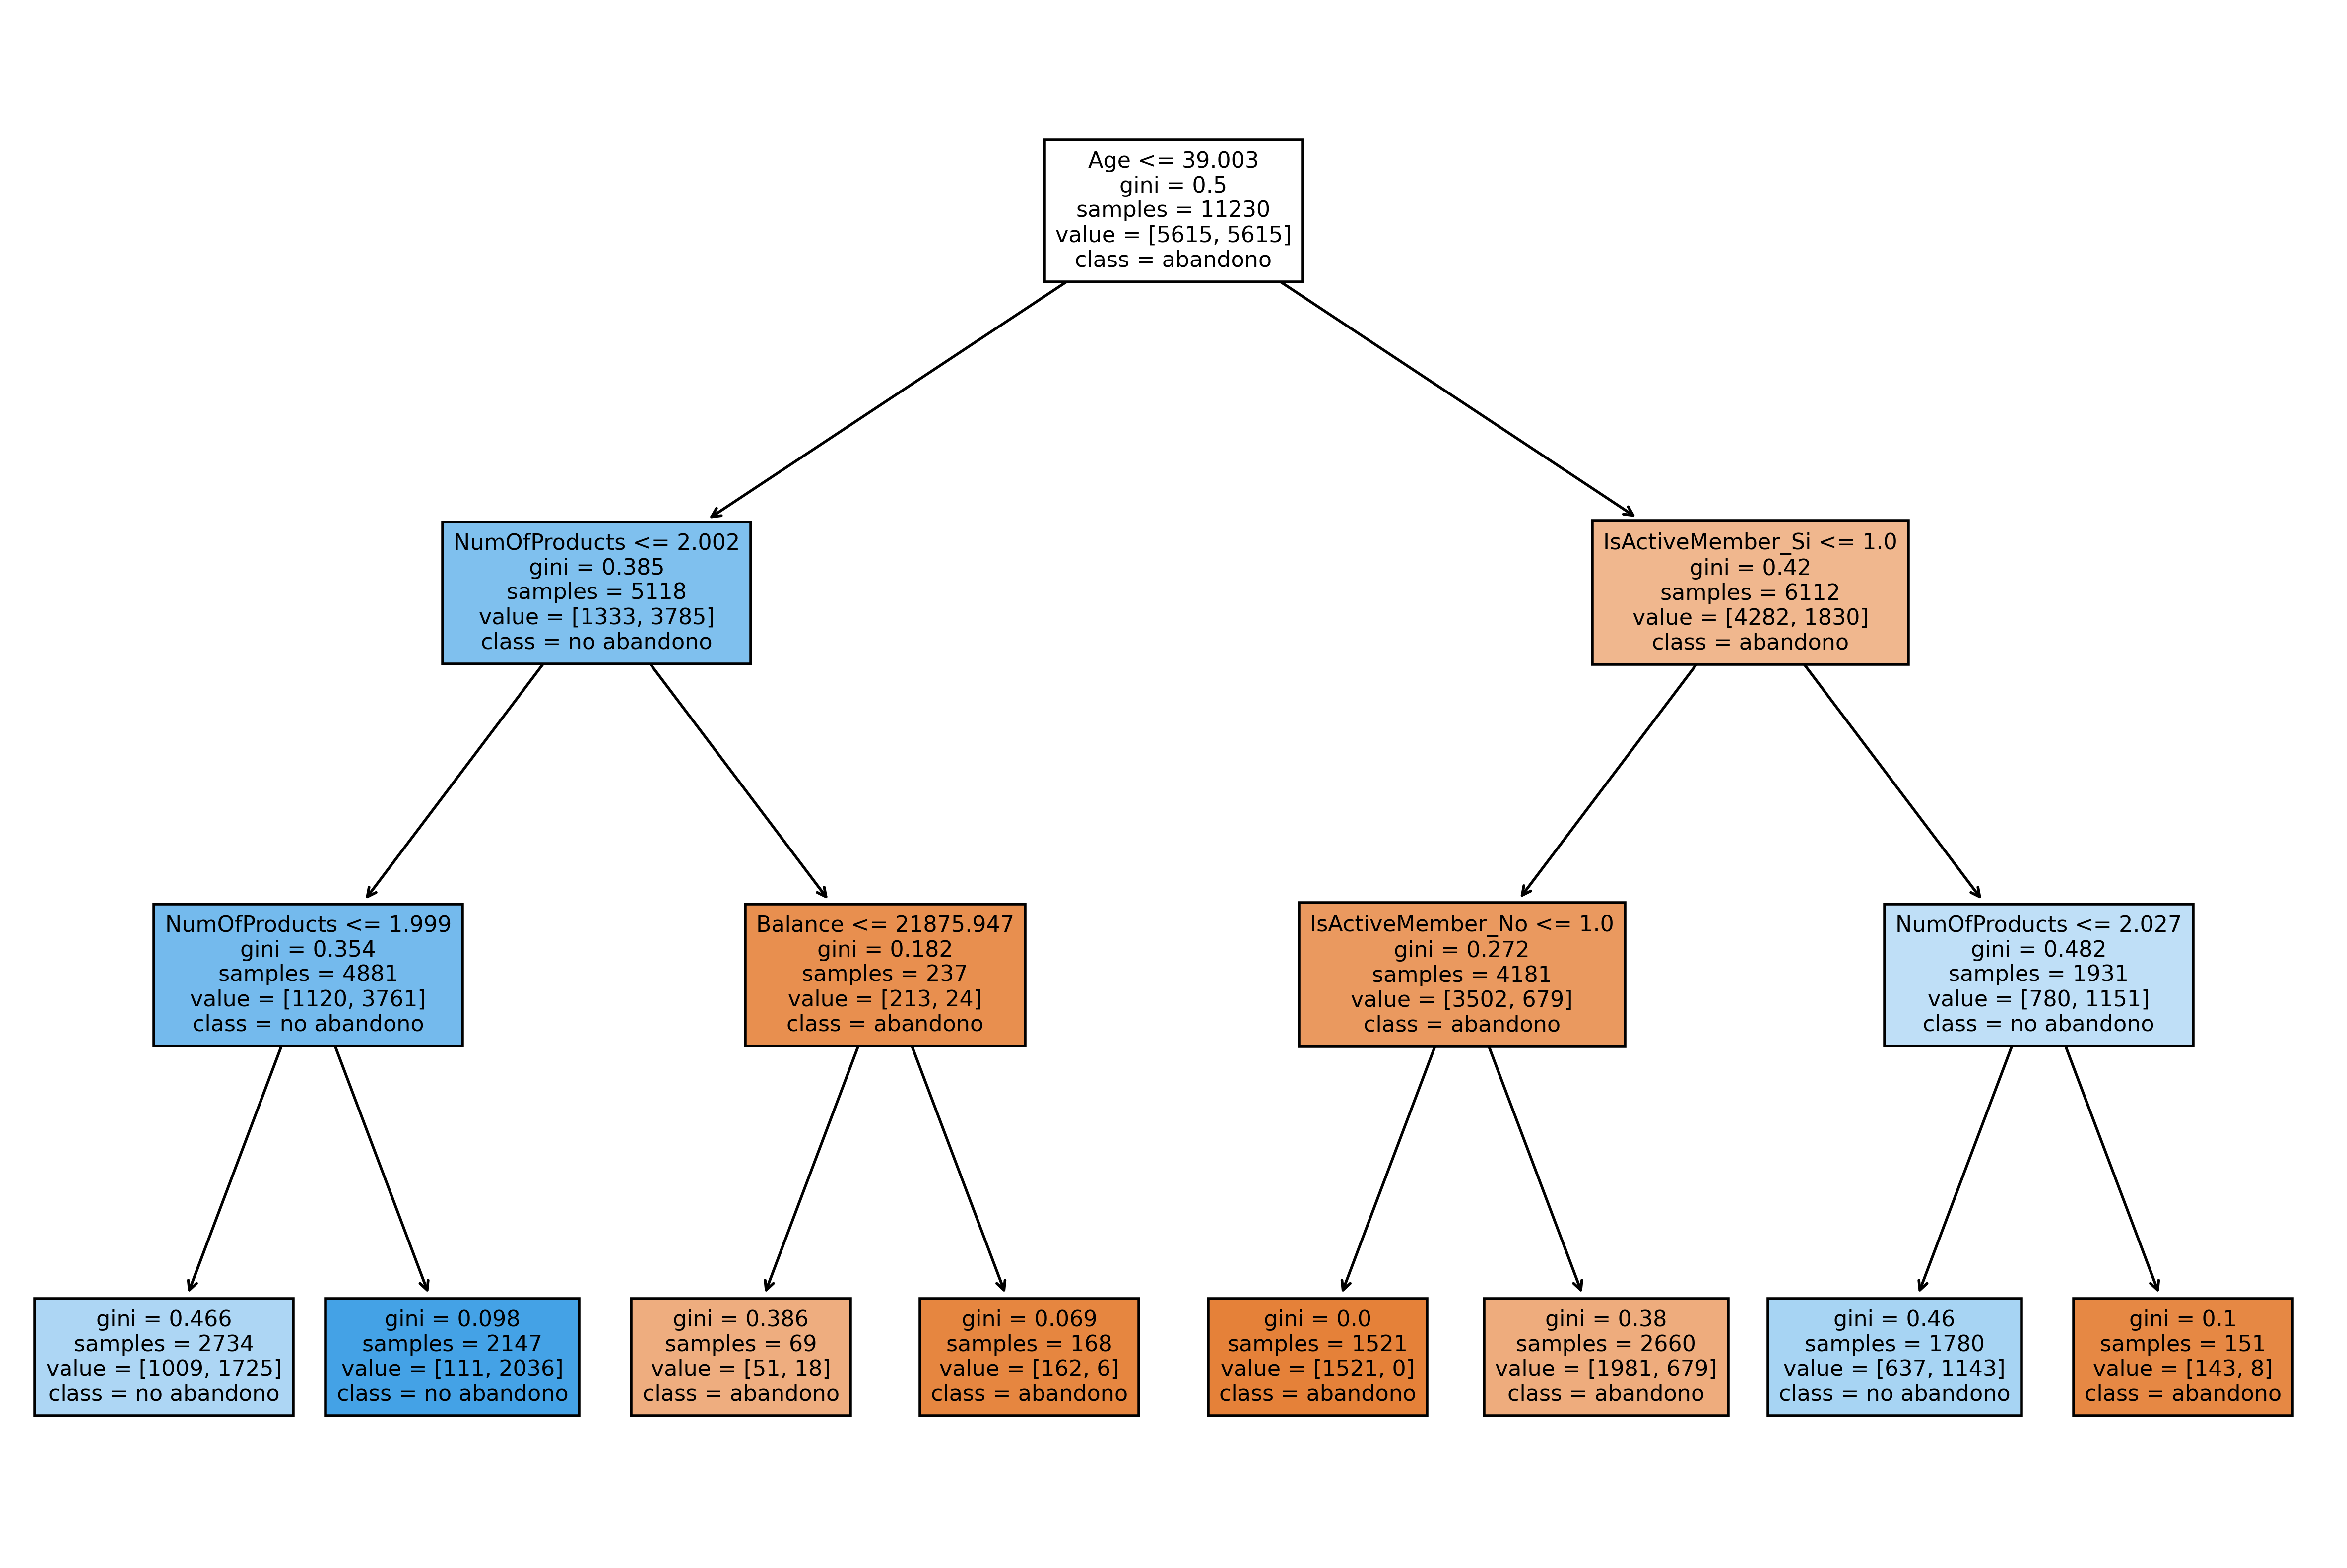

In [45]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=400)
tree.plot_tree(dtree_sm,
               feature_names = sm_X_train_df.columns.tolist(), 
               class_names=list(dtree_sm.classes_),
               filled = True,
               fontsize=8);

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth':[2,3,4,5,10,12,15,20,25,30]}

In [48]:
grid = GridSearchCV(DecisionTreeClassifier(),param_grid,refit=True,verbose=3)

In [49]:
# puede que tarde un poco
grid.fit(sm_X_train_df,sm_y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .......criterion=gini, max_depth=2;, score=0.678 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=2;, score=0.776 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=2;, score=0.797 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=2;, score=0.795 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=2;, score=0.781 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=3;, score=0.710 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=3;, score=0.790 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=3;, score=0.805 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=3;, score=0.801 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=3;, score=0.789 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.692 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=4

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 10, 12, 15, 20, 25, 30]},
             verbose=3)

In [50]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [51]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=10)

In [52]:
grid_predictions = grid.predict(X_test_df)

In [53]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

    abandono       0.64      0.53      0.58       652
 no abandono       0.88      0.92      0.90      2348

    accuracy                           0.83      3000
   macro avg       0.76      0.72      0.74      3000
weighted avg       0.82      0.83      0.83      3000



In [54]:
dtree_sm_grid = DecisionTreeClassifier(criterion=grid.best_params_['criterion'], max_depth=grid.best_params_['max_depth'])

In [55]:
dtree_sm_grid.fit(sm_X_train_df,sm_y_train)

DecisionTreeClassifier(max_depth=10)

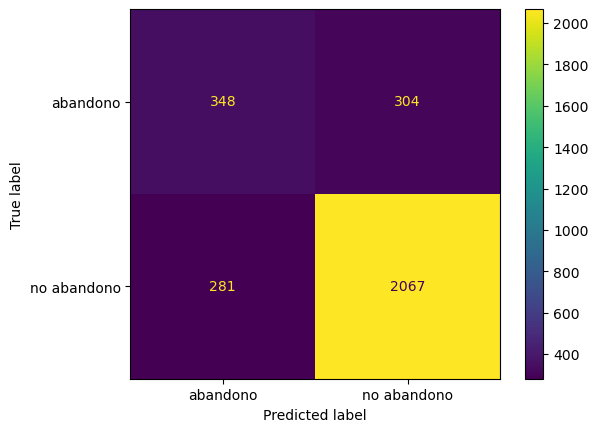

In [56]:
plot_confusion_matrix(dtree_sm, X_test_df, y_test)  
plt.show()

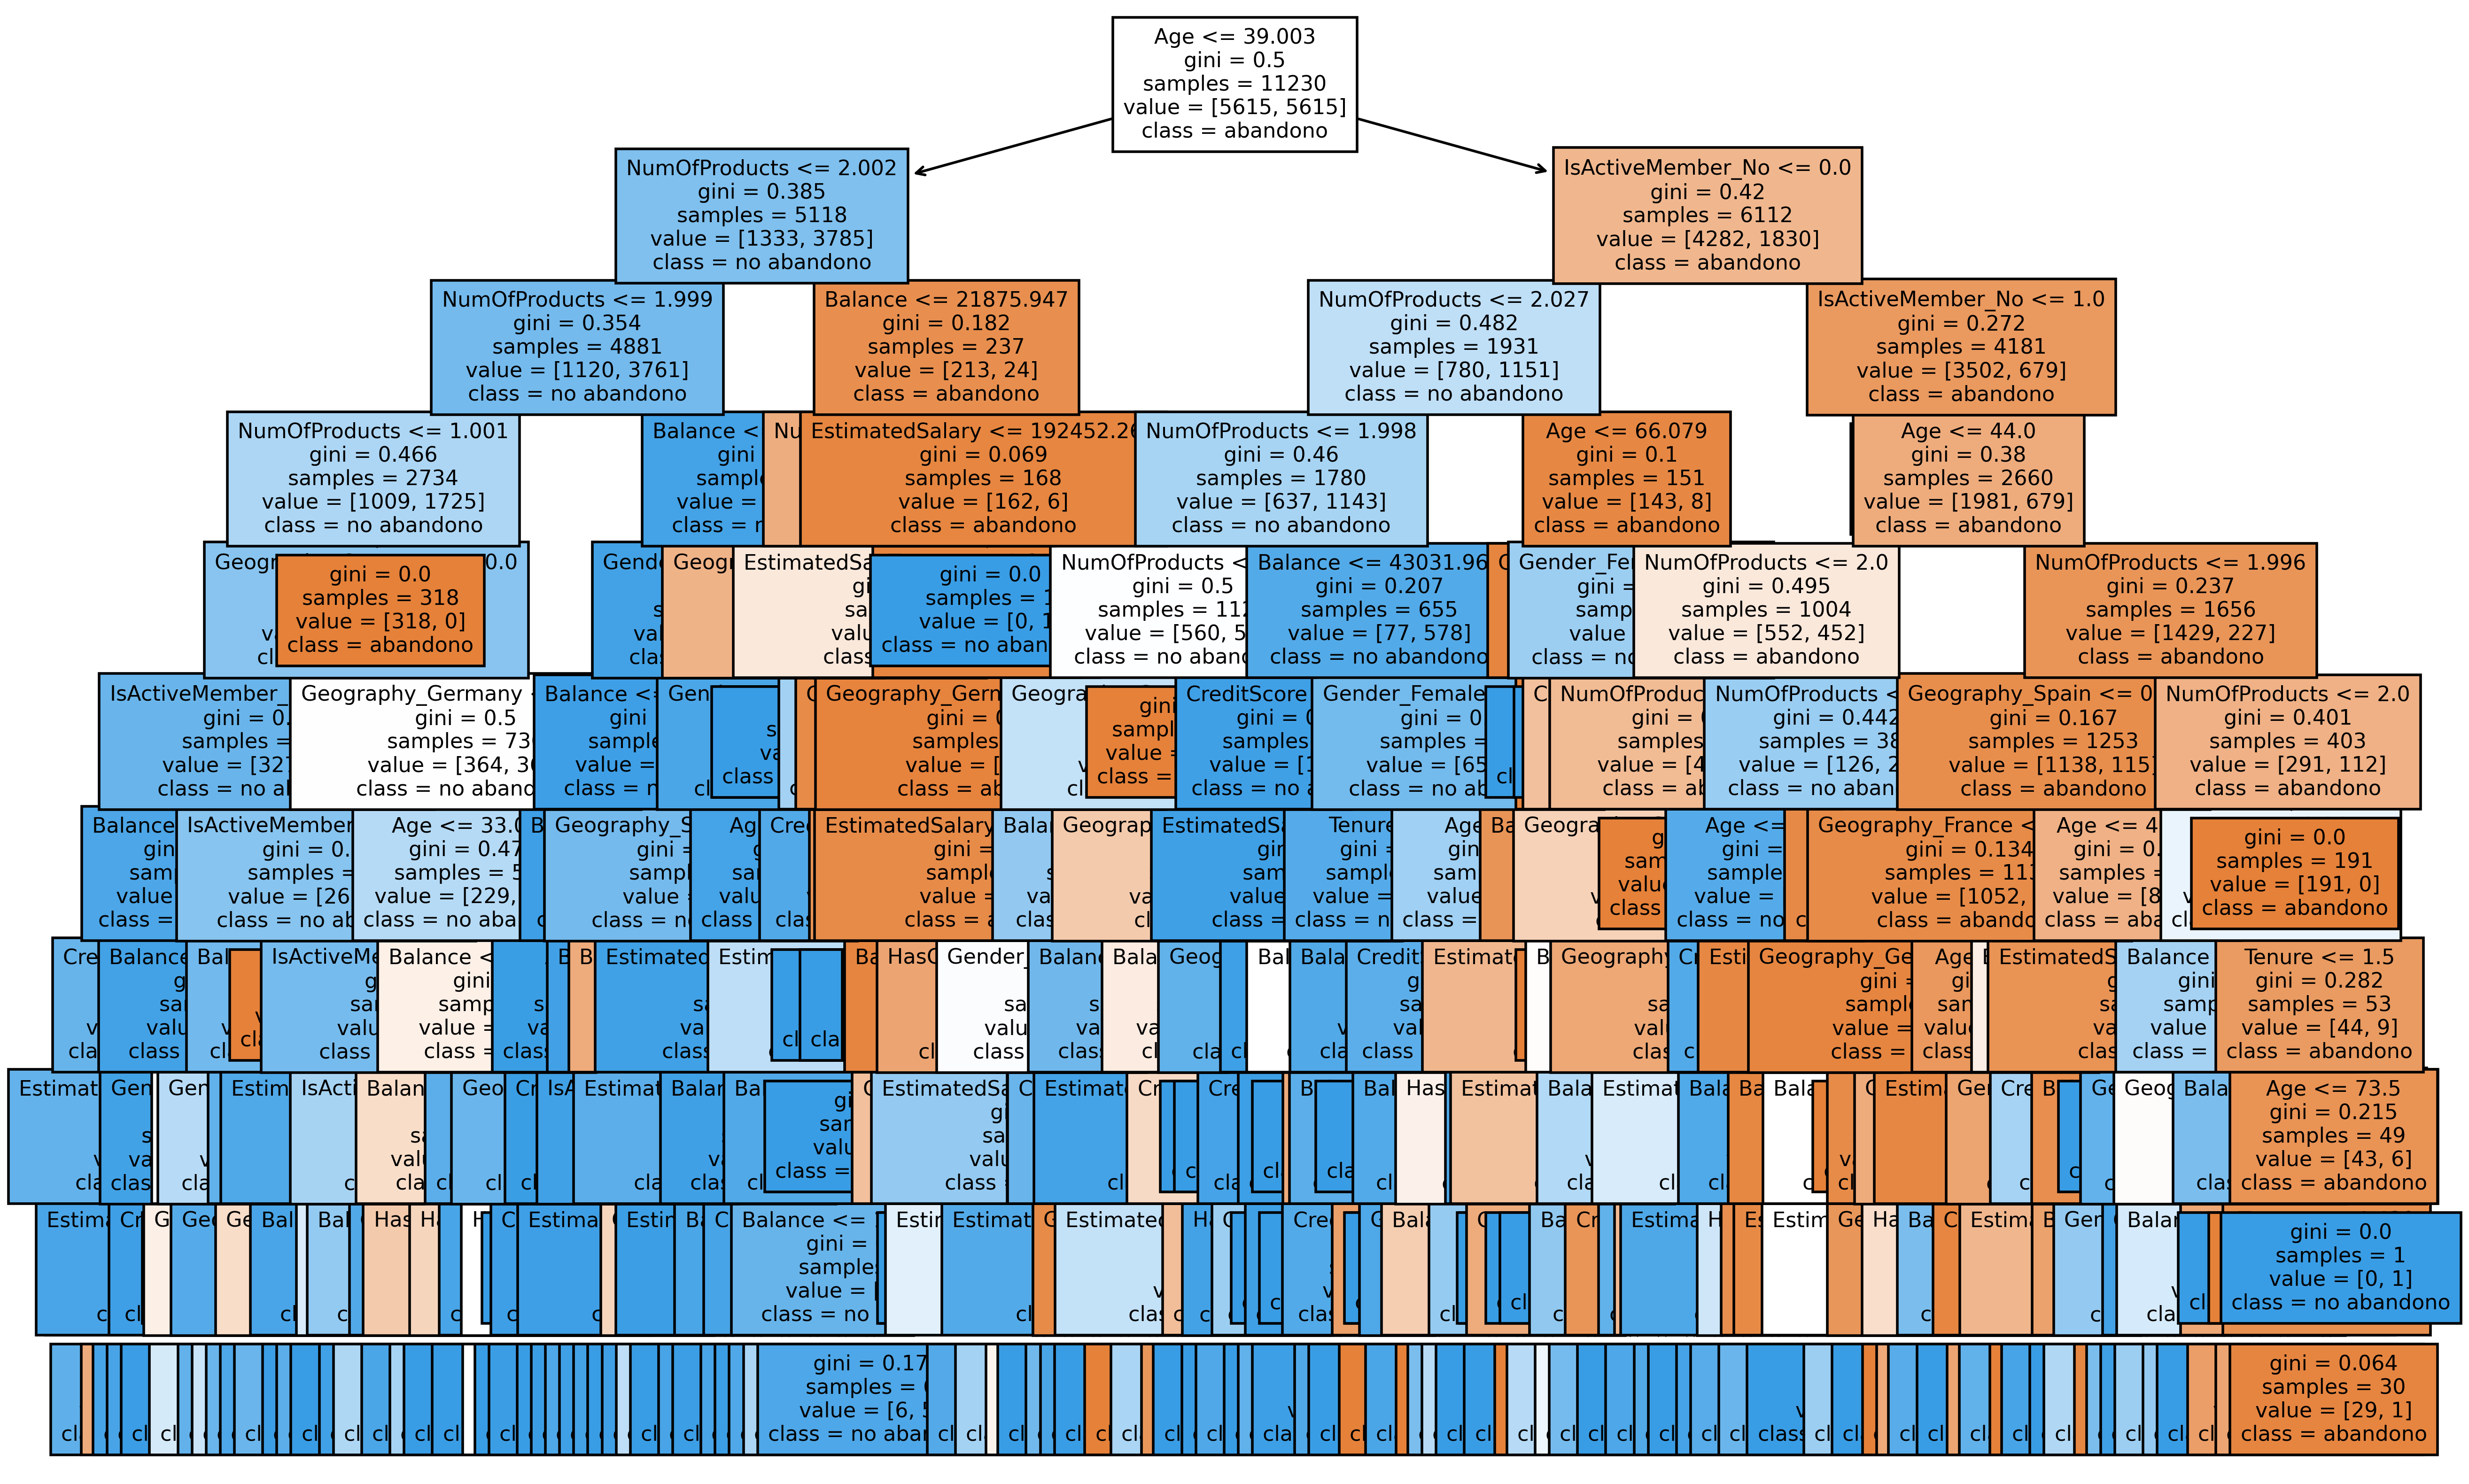

In [57]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=400)
tree.plot_tree(dtree_sm_grid,
               feature_names = sm_X_train_df.columns.tolist(), 
               class_names=list(dtree_sm_grid.classes_),
               filled = True,
               fontsize=8);

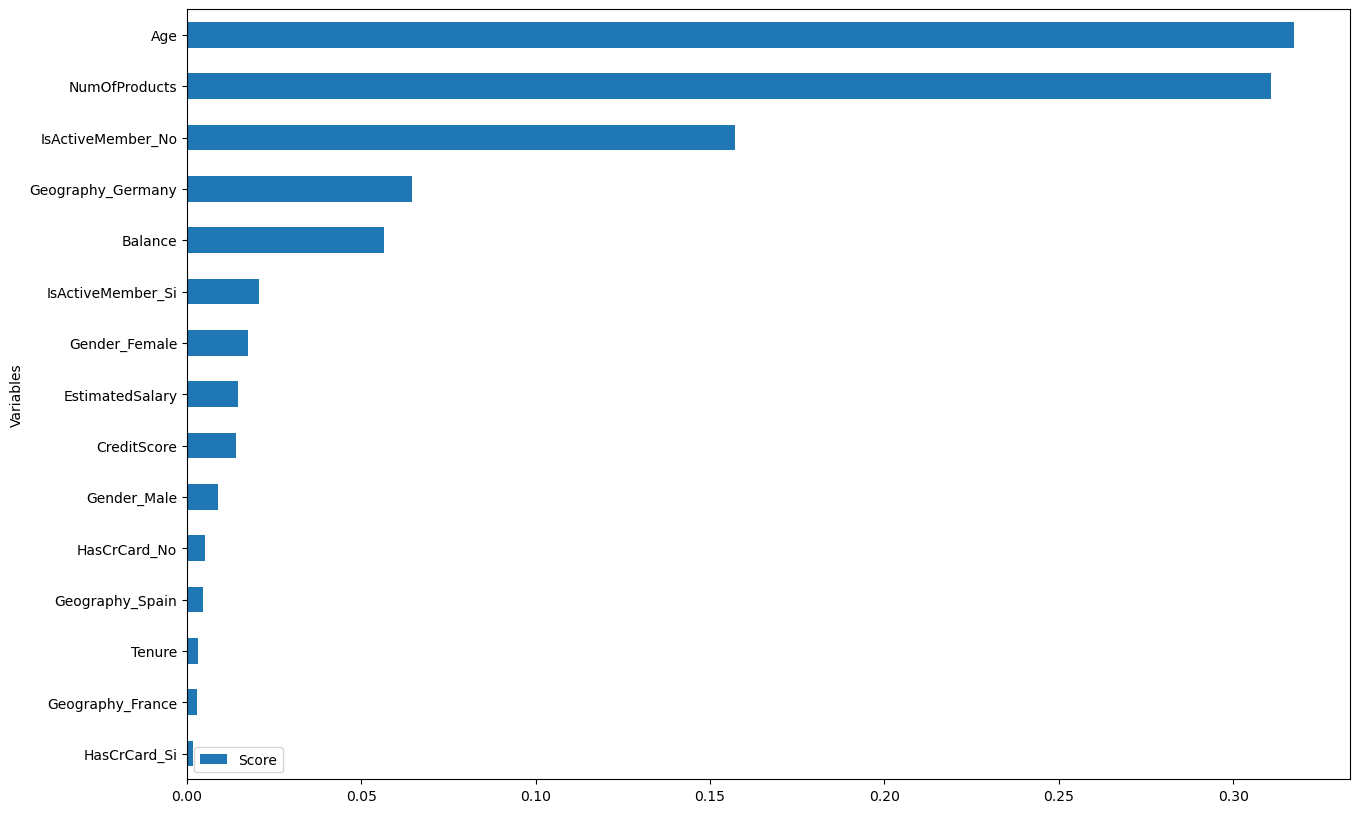

In [58]:
importancia = pd.DataFrame()
importancia['Variables'] = sm_X_train_df.columns
importancia['Score'] = dtree_sm_grid.feature_importances_
importancia.sort_values(by='Score',ascending=True).plot(x='Variables',y='Score',kind='barh',figsize=(15, 10))

plt.show()

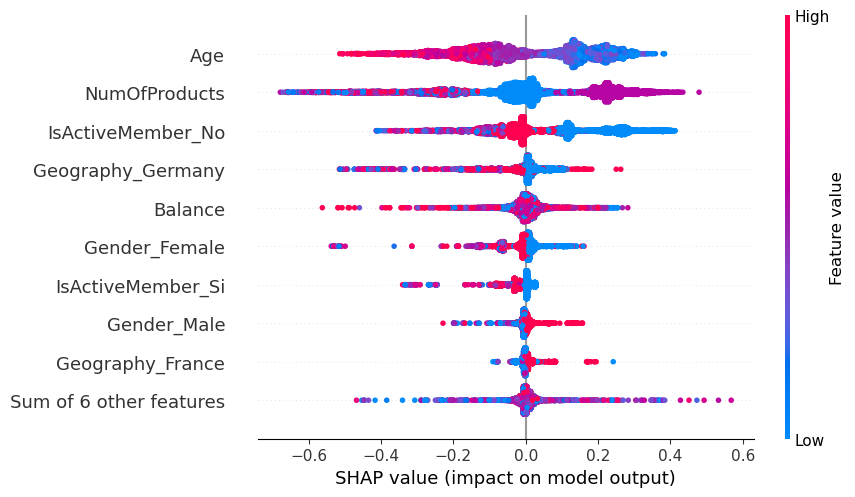

In [59]:
explainer = shap.Explainer(dtree_sm_grid)
shap_values = explainer(sm_X_train_df)
shap.plots.beeswarm(shap_values[:,:,1])

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
max_depth_range = [2,3,4,5,10,12,15,20,25,30]

accuracy_trainset = []
accuracy_testset = []

for depth in max_depth_range:
    # Crear y Ajustar el Modelo
    prune_model = DecisionTreeClassifier(random_state=1, max_depth=depth)
    prune_model.fit(sm_X_train_df,sm_y_train)
    train_pred = prune_model.predict(sm_X_train_df)
    test_pred = prune_model.predict(X_test_df)
    train_acc = accuracy_score(sm_y_train,train_pred)
    test_acc = accuracy_score(y_test,test_pred)

    accuracy_trainset.append([train_acc,test_acc])
    
df_prune = pd.DataFrame(accuracy_trainset, columns = ['train','test'])
df_prune['depth'] = max_depth_range

<AxesSubplot:xlabel='depth'>

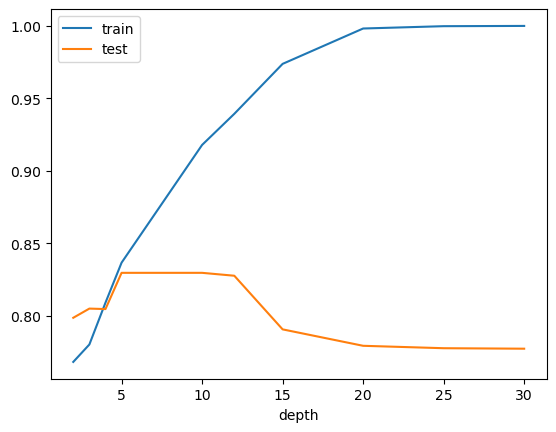

In [62]:
df_prune.plot(x='depth')

# Fin